In [1]:
from sklearn.datasets import load_iris
import pandas as pd 

In [2]:
# Load the Iris dataset
data = load_iris()

In [4]:
# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns = data.feature_names)
                  

In [5]:
# Convert to a DataFrame for easier manipulation
print("Dataset after loading and preprocessing:")
print(df.head())

Dataset after loading and preprocessing:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


K-Means Clustering Overview
How it Works: K-Means is an iterative clustering algorithm that partitions data into k clusters. It operates in the following steps:

Initialization: Randomly selects k points as initial centroids (cluster centers).
Assignment: Each data point is assigned to the nearest centroid, forming k clusters.
Update: New centroids are calculated by taking the mean of the points in each cluster.
Repeat: Steps 2 and 3 are repeated until the centroids no longer change, indicating convergence.

Suitability for the Iris Dataset: The Iris dataset is known for having three distinct classes, making it a good candidate for K-Means, especially when using three clusters (k=3). Since K-Means assumes spherical clusters with equal variance, it performs reasonably well when clusters are compact and well-separated, as in this dataset.

In [7]:
#Code for K-Means Clustering and Visualization
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Initialize KMeans with 3 clusters (since there are 3 species in Iris)
kmeans = KMeans(n_clusters=3, random_state = 42)
              

In [10]:
# Fit and predict the clusters
df['cluster'] = kmeans.fit_predict(df)

In [11]:
# Reduce dimensions to 2D for visualization with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('cluster', axis = 1))


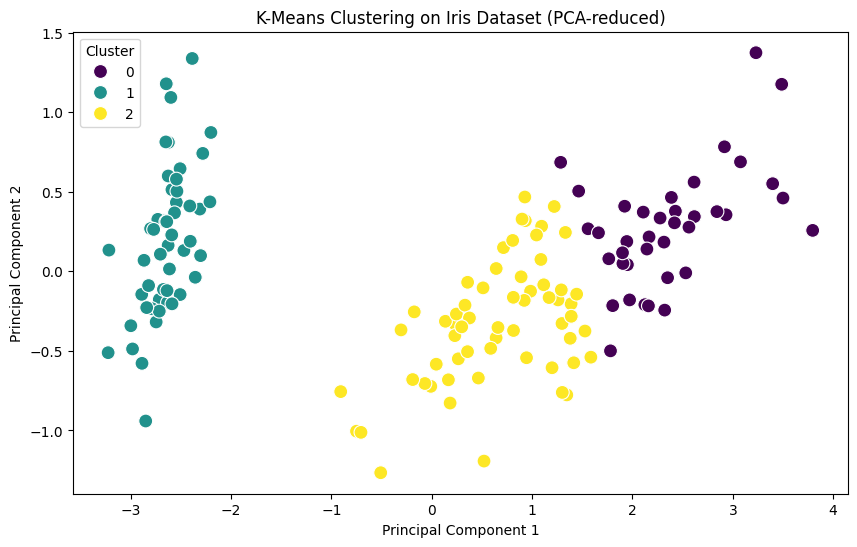

In [14]:
# Plotting the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['cluster'], palette='viridis', s=100)
plt.title("K-Means Clustering on Iris Dataset (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

Hierarchical Clustering Overview
How it Works: Hierarchical Clustering is a method of grouping data points into a tree-like structure (dendrogram) based on their similarity. There are two main types:

Agglomerative (Bottom-Up): Each data point starts as its own cluster, and pairs of clusters are merged step-by-step based on similarity (typically distance).
Divisive (Top-Down): Starts with all data points in one cluster, then recursively splits clusters until each point is its own cluster.
Agglomerative Hierarchical Clustering is most common, and we’ll use it here with the Ward linkage criterion, which minimizes the variance within each cluster.

Suitability for the Iris Dataset: Hierarchical Clustering is well-suited for the Iris dataset because it doesn’t require specifying the number of clusters in advance, and the tree structure provides insights into the relationships between data points. The hierarchical approach can help us visualize how individual flowers group into clusters, potentially revealing natural clusters corresponding to the three Iris species.

In [21]:
#Code for Hierarchical Clustering and Visualization
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt



In [23]:
# Apply Agglomerative Clustering with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df.drop('cluster', axis=1))


In [25]:
# Generate the linkage matrix for dendrogram
Z = linkage(df.drop(['cluster', 'Hierarchical_Cluster'], axis=1), method='ward')


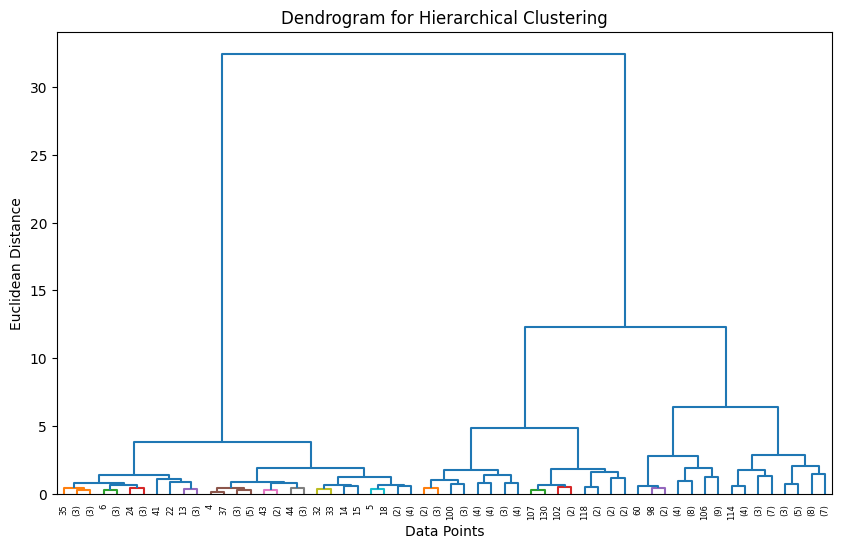

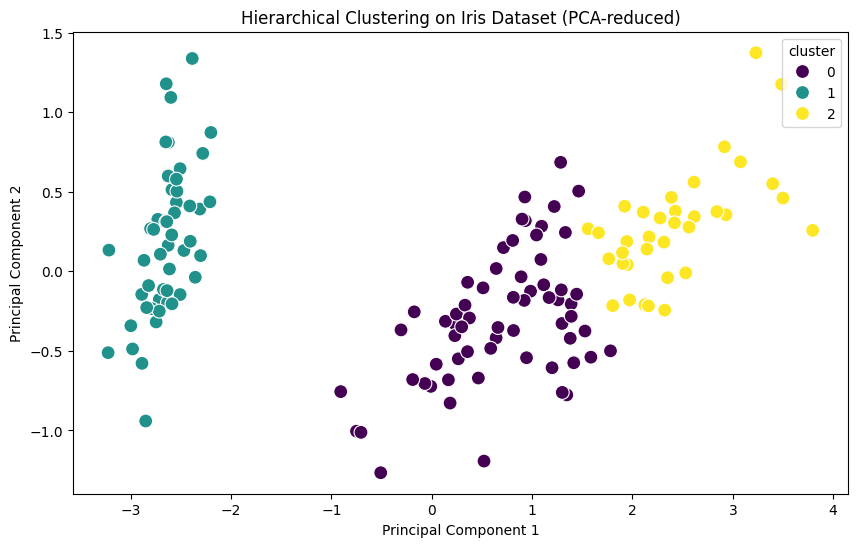

In [28]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=0.5, show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# 2D Visualization of clusters (using PCA for dimensionality reduction)
plt.figure(figsize=(10, 6))
df_pca_hierarchical = pca.fit_transform(df.drop(['cluster', 'Hierarchical_Cluster'], axis=1))
sns.scatterplot(x=df_pca_hierarchical[:, 0], y=df_pca_hierarchical[:, 1], hue=df['Hierarchical_Cluster'], palette='viridis', s=100)
plt.title("Hierarchical Clustering on Iris Dataset (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="cluster")
plt.show()